# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

**Q.** Does the Smartcab move at all during the simulation?  
**A.** No. Smartcab is stationary in the randomly assigned initial position.

**Q.** What kind of rewards is the driving agent receiving?  
**A.** The driving agent is receiving numerical score as rewards for each sound decision it makes.  

**Q.** How does the light changing color affect the rewards?  
**A.** The score is based on very basic traffic regulations **that includes U.S. right-of-way rules.** Thus, positive score was awarded when the driving agent properly abide by the traffic rule on a red light (in the current where the agent is stationary, it is just a coincidence that the Smartcab is making a "sound decision"). A negative score was awarded when the driving agent idled at a green light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**  
**Q.** *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*  
**A.** Arbitrarily chose three flags that can modify the simulation.
- `display`: Can be toggled either as True of False to either display or not display the `pygame` simulation.
- `num_dummies`: Modifies the number of "other cars".
- `grid-size`: Modifies the road number where for a given (x, y), x number of horizontal and y number of vertical roads are generated.
    
    
**Q.** *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*  
**A.** `env.act()` class method is invoked upon agent's action. The keyword `env` was searched in the `agent.py` file and found out that an Environment class function `env.act()` is included in the agent's `update()` function. 


**Q.** *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*  
**A.** `render_text()` renders information on terminal/command prompt (textual rendering). `render()` renders simulation on the `pygame` window (visual rendering).


**Q.** *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*  
**A.** The `elif` in the `next_waypoint()` method indicates that _East-West direction_ is considered first, followed by the _North-South_.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step. 

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


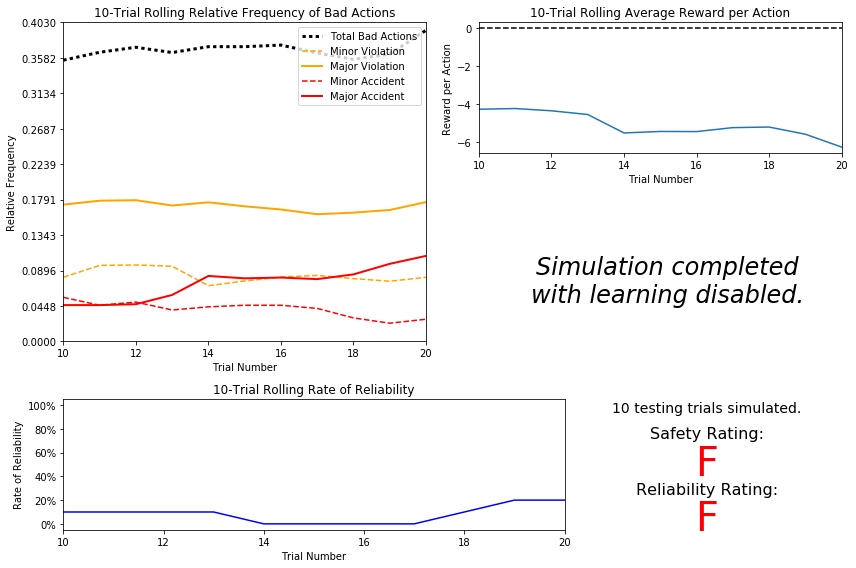

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**  
**Q. ** *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*  
**A. ** The black dotted plot indicates the driving agent is making bad decisions approximately 36% of the total actions. The driving agent is causing major and minor accidents approximately 7% and 3% of the total actions respectively. In other words, major and minor accidents are occuring 28% of the time that the driving agent is making bad decisions. 


**Q. ** *Given that the agent is driving randomly, does the rate of reliabilty make sense?*  
**A. ** The "10-Trial Rolling Rate of Reliability" shows that the Rate of Reliability percentage within the 20 trials is not showing major improvemets. Moreover, Reliability Rating score is provided as "F". These low rates of reliabiliy make sense given that the agent is driving randomly.  


**Q. ** *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*  
**A. ** Agent is receiving numerical scores for each violations and accidents. When the frequency of major accidents doubled from around 0.045 to 0.09, with the frequencies of all other being relatively constant, reward per action dropped from around -4 to -6. The inference whether the agent is being penalized heavily enough cannot be determined only with the information provided. Information regarding how well the driving agent learns from the rewards/penalties needs to be provided to determine whether rewards are chosen heavy enough.  


**Q. ** *As the number of trials increases, does the outcome of results change significantly?*  
**A. ** No. All three plots show no significant fluctuations. This is because the driving agent is not learning from its actions.  


**Q. ** *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*  
**A. ** No. Given the fact that learning is disables, and as can be observed from the contantly low reliability rates and rewards per action, the Smartcab is not yet "smart" to learn from bad decisions and prone to make violations and accidents.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**  
Below parameters were selected under the assumption that all other cars strictly abide by the U.S. right-of-way rules.  


`waypoint` and `light`: Intended directions of Smartcab and the traffic lights are the most basic parameters for not only the safety and efficiency of the agent, but also for operating the simulation itself. 


Additionally, following parameters were selected based on the U.S. right-of-way traffic laws.  
`left`: Relevant in case the Smartcab is making a left turn. For example, knowing that the vehicle on the left is going straight is essential to avoid an accident.
`oncoming`: Relevant in case the Smartcab is making a left turn. For example, knowing that the vehicle ahead is going straight is essential to avoid an accident.


Thus, ** `waypoint`, `light`, `left`, and `oncoming`**


`right`: Intended direction of travel for vehicle to the Smartcab's right is not necessary for either avoiding accidents or efficiency.  


**`deadline`: `deadline` is used only to measure how close the Smartcab is getting to the destination. Thus, including this parameter will not change safety or efficiency of the Smartcab.**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**  
All possible combinations are `waypoint`(**3**) \* `light`(2) \* `left`(4) * `oncoming`(4) = **_96 combinations_**.  
The size of training trials will have to be greater than **96** to visit as many states as possible. Doubling and tripling the size of the state space result in trial sizes of around 200 and 300. These numbers are not extremely big, so I believe the driving agent could learn a policy for each possible state within a reasonable number of training trials.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

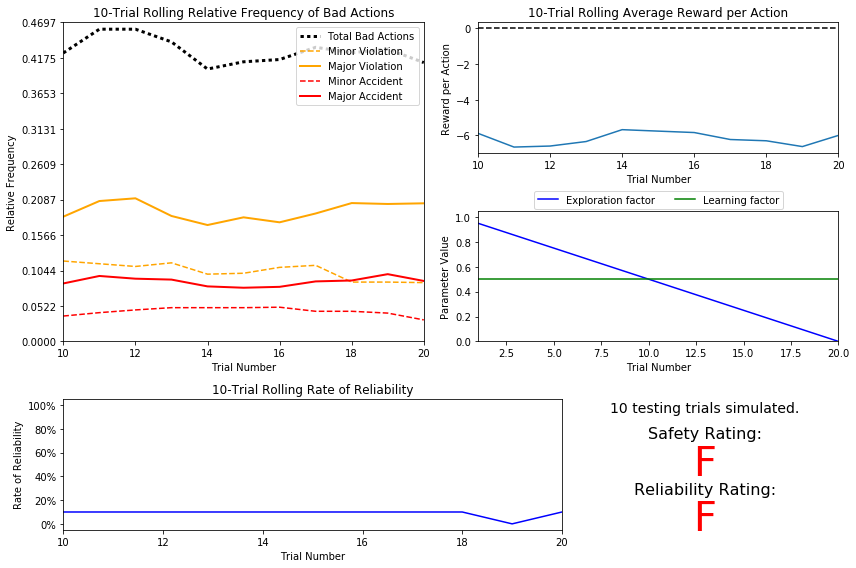

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**    
**Q. **  *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*  
**A. **  Low reliability rate is similar for both the basic driving agent and the default Q-learning agent. This means that both agents do not have `success_ratio` above 60% to be classified with a score better than F.


**Q ** *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*  
**A. ** 20 Trials were required. This number makes sence becasue the agent started with an epsilon of 1, deducted by 0.05 on each iteration, and reached an epsilon below tolerance on the 21st training according to the decay function $$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$.  

  
**Q. **  *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*  
**A. **  Yes, epsilon decreased linearly according to the decaying function.  

 
**Q. **  *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*  
**A. **  The number of bad actions decreased and the averge reward increased. Given that the agent is now doing a Q-learning, these results make sense.  

  
**Q. **  *How does the safety and reliability rating compare to the initial driving agent?*  
**A. **  Safety rating has improved as can be seen both from the "10-Trial Rolling Relative Frequency of Bad Actions" graph and the letter grade. However, reliability rating showed no improvements in letter grade, and worsened in the 10-Trial Rolling Rate Reliability.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

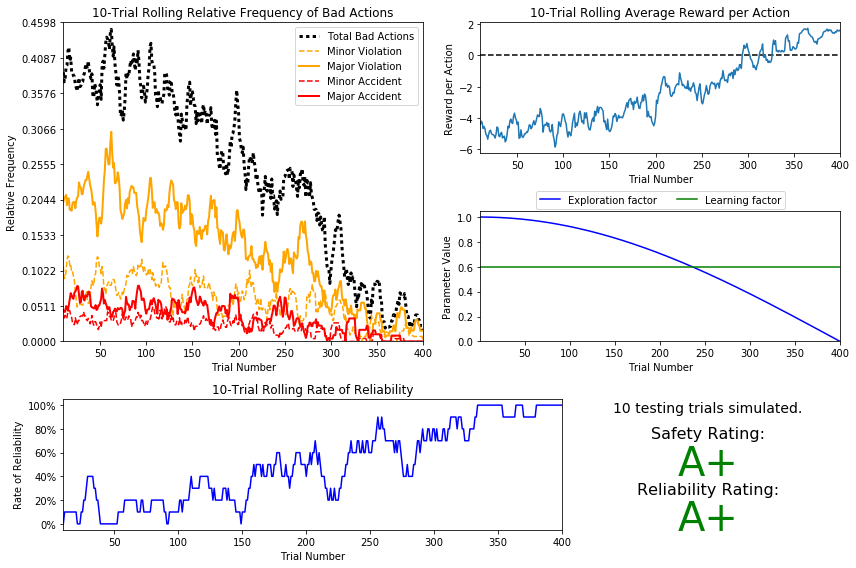

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**Q.  ** *What decaying function was used for epsilon (the exploration factor)?*  
**A.  **  $$ \epsilon = cos(\pi*0.5*(t/400)) \   $$


**Q.  ** *Approximately how many training trials were needed for your agent before begining testing?*  
**A.  ** **The decay equation was set to approach 0 as the number of iteration gets closer to the denominator.**

**Q.  ** *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*  
**A.  ** Tolerance of 0.000015 (very close to 0) and alpha of 0.5 were used. Considering the state space size of **96**, 400 trainings were deemed to be a good fit. For this reason, epsilon-tolerance was tuned to generate 400 iterations. Learning rate alpha was rather arbitrarily set to 0.5. This kept half the old information and overwrote the other half with new information on each iteration. 


**Q.  ** *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*  
**A.  **  Compared to the default Q-Learner from the previous section, average rewards and relative frequencies of major violation and major accidents showed great improvements; average rewards approached 0 and major violations and accidents converged to 0.


**Q.  ** *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*  
**A.  **  The agent is learning to _some_ extent but not significantly. Major improvements should be made with the rates of total bad actions and minor accidents. Average reward per action should also be pushed up even further.


**Q.  ** *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*  
**A.  **  **Yes** Safety and reliability rates were both rated as A+. Moreover, the upward rising plots of both _Rate of Reliability vs. Trial Number_ and  _Reward per Action vs. Trial Number_ ensures that with more trials given, Smartcab will be both more reliable and safe.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:**   
**Q.  ** Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like.   
**A.  ** Defined state: `(waypoint, light, left, oncoming)`.   
Tricky cases to consider are when the agent is making turns. (In the below examples, \_ is used to indicate the element does not matter.)  
- Left turn:    
(left, green, \_ , forward): forward  
(left, green, \_ , None): left  
- Right turn:  
(right, green, \_ , \_ ): right  
(right, red, None, \_ ): right  
(right, red, forward, \_ ): none  

**Q.  **  For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state?  
**A.  **  To test the accuracy of policies, five samples from `'sim_improved-learning.txt'` relevant to the examples listed above were chosen.  
    - line 47: ('left', 'green', None, 'forward'):      Forward   (correct)
    - line 77: ('left', 'green', 'right', None) :       Left      (correct)
    - line 65: ('right', 'green', 'left', 'right'):     None      (incorrect)
    - line 365: ('right', 'red', None, None):           None      (incorrect)
    - line 413: ('right', 'red', 'forward', 'forward'): None      (correct)      
The results were correct 60% of the time. 


**Q.  **  Are there any states where the policy is different than what would be expected from an optimal policy?  
**A.  **  The two incorrect examples above are examples of states where the policy is different than what would be expected from their optimal policies.

**Q.  **  Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.  
**A.  **  The first correct example from the 5 examples listed above is chosen (the one in `line 47`).    
     `('left', 'green', None, 'forward')  
     -- forward : -15.98  
     -- right : -240.63  
     -- None : -31.37  
     -- left : -55.34`  
 This is a senario where the Smartcab is trying to make a left at a green traffic light, and the vehicle ahead is planning to drive forward (the intended direction of vehicle on the left will not matter in this case). Moving forward is the correct action to take because first, making a left will lead to a major accident with the vehicle coming from ahead and second, taking `None` action will block traffic.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Examining `environment.py` showed that:
1. Smartcab is not rewarded for making a decision that moves closer destination. In other words, rewards are soley based on making locally correct decisions, relevant to the U.S. right-of-way rules. For this reason, adding the future reward term will not help a Smartcab to make better deicision to move towards the destination.
2. If the route were fixed, then introducing a long-term reward would be meaningful. In our case where each testing iteration is composed of a random starting point and a random ending point, future reward is not applicable.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.